In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Evaluate the consistency between data and a model

To understand how consistency of a dataset with a model can be evaluated, we start with a simple example. We use the last model described in the previous section that states that 100 data points are generated independently from a Unif(1,5) distribution. 

The next cell shows the creation of a dataset saved in an array of length 100 called `dataset`; for the moment, ignore the way the data was generated. The histogram of the data is also displayed.

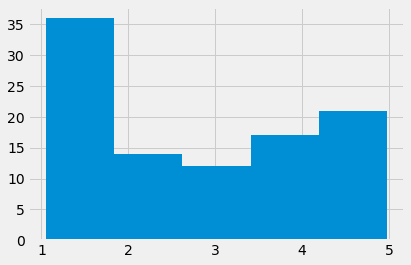

In [2]:
np.random.seed(5678)
dataset=np.concatenate((np.random.uniform(1,2,size=20),np.random.uniform(1,5,size=80)))
plt.hist(dataset,bins=5);

Is it plausible that the data shown in the above histogram was generated from the Unif(1,5) distribution?

The histogram is not entirely conclusive. We can simulate datasets of the same sample size (100) from the Unif(1,5) distribution, but it is unclear how we can compare histograms. 

It is easier to evaluate a numerical characteristic of the data, such as the median, instead of looking at the full dataset. Below we calculate the median of the values in our data and we also generate 1000 datasets from our model for which we obtain their medians.

In [3]:
np.median(dataset)

2.6163071401622053

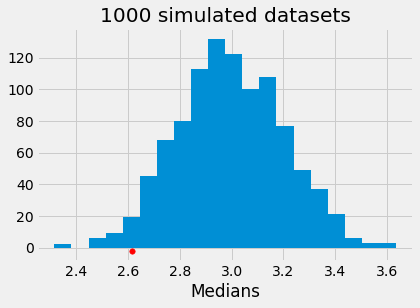

In [4]:
# array where we will save the simulated medians
med_dist=np.array([])

# generate 1000 medians 
for i in np.arange(1000):
    med_dist=np.append(med_dist,np.median(np.random.uniform(1,5,size=100)))

plt.hist(med_dist,bins=20)
plt.scatter(np.median(dataset), -2, color='red', s=30)
plt.title('1000 simulated datasets')
plt.xlabel("Medians");

The above histogram shows the 1000 medians we generated together with the median value we had in our dataset (the red dot). The location of the red dot in this distribution is an indication of how consistent the data are with the model. One indicator of consistency is how likely it is to obtain the observed median or something more extreme from our model. 

In [5]:
sum(med_dist<=np.median(dataset))/1000

0.023

We see above that 2.3% of datasets obtained from our model have a median that is at least as small as the observed one (note that rerunning the simulations will lead to a different number - more on this in Chapters 10 and 12). We can use this information to get insight into our question. A schematic of the process we use to determine consistency is below and has the following steps: 
- select a statistic, S, that will be used to check consistency (we used the median in the above example); 
- use the model to generate/simulate datasets; 
- compare the observed value for the statistic, S, with the distribution obtained for S from the datasets generated from the model (as we did in the histogram above). 

<img align="center" src="./dgm2.png" width="400"/>

The question we pose is: *How likely is to obtain a value for S as extreme as what we have in  our data from the distribution we generated?* In the above example, the tail probability, 0.023, was a possible answer to this question.

**Note:** The choice of statistics is an important consideration as results and conclusions could differ from statistic to statistic (for an example of this, see Section 13.3). 

We now turn to a real dataset that contains the number of births by state, race, age of mother and infant gender. We downloaded the data from CDC: https://wonder.cdc.gov/natality.html.



In [6]:
#data from CDC
natality2016=pd.read_csv("../../data/Natality2016.csv")
natality2016.head(3)

,State,Single.Race,Age.of.Mother.9,Gender.Code,Births
0,Alabama,American Indian or Alaska Native,15-19 years,F,10
1,Alabama,American Indian or Alaska Native,20-24 years,F,24
2,Alabama,American Indian or Alaska Native,20-24 years,M,26


In [7]:
natality2016[['Gender.Code','Births']].groupby('Gender.Code').sum()

,Births
Gender.Code,
F,1925598
M,2016003


We can see from the above summary that, in 2016, more boys were born in the United States than girls. Is this consistent with the model where the probability of having a boy is 0.5? We can answer this immediately by generating data from that model. We use the binomial distributions (does it make sense here?) with n = 1,925,598 + 2,016,003 = 3,941,601 to investigate this question. The histogram below shows that having more than 2 million boys is inconsistent with our binomial model, suggesting that the probability of having a boy is not equal to 0.5.

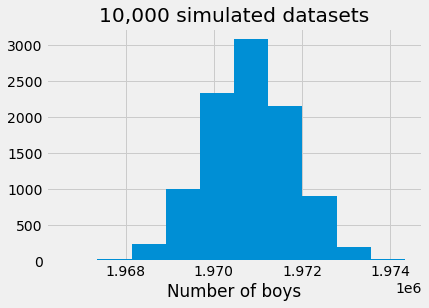

In [8]:
plt.hist(np.random.binomial(1925598+2016003,0.5,size=10000))
plt.title('10,000 simulated datasets')
plt.xlabel("Number of boys");

It turns out that for many countries, the probability of having a boy is 0.512 which corresponds to 105 boys being born for every 100 girls, leading to a ratio of 1.05 which is known as the secondary sex ratio (SSR). You can read more information on [sex ratio here](https://en.wikipedia.org/wiki/Sex_ratio).